<a href="https://colab.research.google.com/github/Rohith15119/FSD-Project-1/blob/main/DWDM_PROJECT_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

from sklearn.metrics import accuracy_score,classification_report
from sklearn.neighbors import KNeighborsRegressor

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/calories.csv')
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [3]:
df.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


# Detecting the Noisy Data and Normalizing the Tuples


# Fixing The Noisy Data using Clip Method



```

# Clip Method is used where invalid values are get into range of given lower
and upper limits.

```




# **Z-Score Normalization**

In [4]:
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))

# Keep only rows where all features have z < 3
df_no_outliers = df[(z_scores < 3).all(axis=1)]

print("Before:", df.shape)
print("After :", df_no_outliers.shape)

Before: (15000, 9)
After : (14899, 9)


In [5]:
# Clamp values into valid ranges
df_no_outliers["Age"] = df_no_outliers["Age"].clip(lower=0, upper=120)

df_no_outliers["Body_Temp"] = df_no_outliers["Body_Temp"].clip(lower=35, upper=40)

df_no_outliers["Heart_Rate"] = df_no_outliers["Heart_Rate"].clip(lower=30, upper=220)

df_no_outliers['Weight'] = df_no_outliers['Weight'].clip(lower=0, upper=200)

df_no_outliers['Height'] = df_no_outliers['Height'].clip(lower=0, upper=250)

df_no_outliers['Duration'] = df_no_outliers['Duration'].clip(lower=0,upper=120)

# **Checking for Further Outliers**

In [6]:
invalid_age = df_no_outliers[(df_no_outliers["Age"] < 0) | (df_no_outliers["Age"] > 120)]
invalid_hr = df_no_outliers[(df_no_outliers["Heart_Rate"] < 30) | (df_no_outliers["Heart_Rate"] > 220)]

invalid_temp = df_no_outliers[(df_no_outliers["Body_Temp"] < 30) | (df_no_outliers["Body_Temp"] > 45)]

invalid_weight = df_no_outliers[(df_no_outliers["Weight"] < 0) | (df_no_outliers["Weight"] > 200)]

invalid_height = df_no_outliers[(df_no_outliers["Height"] < 0) | (df_no_outliers["Height"] > 250)]

invalid_duration = df_no_outliers[(df_no_outliers['Duration'] < 0) | (df_no_outliers['Duration'] > 120)]

print(f"Invalid Temperature: {invalid_temp.count().sum()}, Invalid Heart Rate: {invalid_hr.count().sum()}, Invalid Age: {invalid_age.count().sum()} , Invalid Duration: {invalid_duration.count().sum()}")

print(f"Invalid Weight: {invalid_weight.count().sum()}, Invalid Height: {invalid_height.count().sum()}")




Invalid Temperature: 0, Invalid Heart Rate: 0, Invalid Age: 0 , Invalid Duration: 0
Invalid Weight: 0, Invalid Height: 0


In [7]:
numeric_cols = df_no_outliers.select_dtypes(include=np.number)
z_scores = np.abs(stats.zscore(numeric_cols))

outliers = (z_scores > 3)  # flag extreme values
print("\nNumber of outliers detected (Z > 3):")
for i, col in enumerate(numeric_cols.columns):
  print(f"{col} : {outliers[:, i].sum()}")


Number of outliers detected (Z > 3):
User_ID : 0
Age : 0
Height : 0
Weight : 1
Duration : 0
Heart_Rate : 0
Body_Temp : 383
Calories : 0


In [8]:
df_no_outliers = df_no_outliers[(~outliers).all(axis=1)]

In [9]:
numeric_cols = df_no_outliers.select_dtypes(include=np.number)
z_scores = np.abs(stats.zscore(numeric_cols))

outliers = (z_scores > 3)  # flag extreme values
print("\nNumber of outliers detected (Z > 3):")
for i, col in enumerate(numeric_cols.columns):
  print(f"{col} : {outliers[:, i].sum()}")


Number of outliers detected (Z > 3):
User_ID : 0
Age : 0
Height : 0
Weight : 0
Duration : 0
Heart_Rate : 1
Body_Temp : 310
Calories : 0


# Removing the Unwanted Columns and Normalising the Tuples

In [10]:
if 'User_ID' in df_no_outliers:
  df_no_outliers.drop('User_ID',inplace=True,axis=1)

In [11]:
le = LabelEncoder()
df_no_outliers['Gender'] = le.fit_transform(df_no_outliers['Gender'])

In [12]:
print(df_no_outliers.info())
print(df_no_outliers.describe())
print(df_no_outliers.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 14515 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      14515 non-null  int64  
 1   Age         14515 non-null  int64  
 2   Height      14515 non-null  float64
 3   Weight      14515 non-null  float64
 4   Duration    14515 non-null  float64
 5   Heart_Rate  14515 non-null  float64
 6   Body_Temp   14515 non-null  float64
 7   Calories    14515 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 1020.6 KB
None
             Gender           Age        Height        Weight      Duration  \
count  14515.000000  14515.000000  14515.000000  14515.000000  14515.000000   
mean       0.495901     42.811919    174.429349     74.926559     15.963968   
std        0.500000     16.989083     14.192893     14.955355      8.059121   
min        0.000000     20.000000    132.000000     36.000000      1.000000   
25%        0.000000     28.000000 

In [13]:
x = df_no_outliers.drop('Calories',axis=1)
y = df_no_outliers['Calories']

x.shape,y.shape

((14515, 7), (14515,))

In [14]:
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.3,random_state=42)

In [15]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(x_tr)
X_test_scaled = scaler.transform(x_te)

# Optimal K Value Selection

In [16]:
k_values = range(1, 21)
cv_scores = []  # store cross-validation scores

In [17]:
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    # use negative MSE because sklearn expects a "score" (higher = better)
    scores = cross_val_score(knn, x_tr, y_tr, cv=30, scoring="neg_mean_squared_error")
    cv_scores.append(-scores.mean())  # make positive (MSE)

In [18]:
best_k = k_values[int(np.argmin(cv_scores))]

# KNN NEIGHBORS


In [19]:
knn = KNeighborsRegressor(n_neighbors=best_k)
knn

KNeighborsRegressor(n_neighbors=8)

In [20]:
knn.fit(X_train_scaled, y_tr)

KNeighborsRegressor(n_neighbors=8)

In [21]:
y_pred = knn.predict(X_test_scaled)

mse = mean_squared_error(y_te, y_pred)
print("Predictions: ")

y_pred

Predictions: 


array([ 56.375,   9.5  , 150.25 , ..., 177.   ,  30.375,  54.5  ])

In [22]:
from math import sqrt

print("MSE:", round(mse,2))
print("RMSE: ",round(sqrt(mse),2))

MSE: 18.28
RMSE:  4.28


In [23]:
print("Accuracy Score: ")
print(round(r2_score(y_te,y_pred),4))

Accuracy Score: 
0.9952


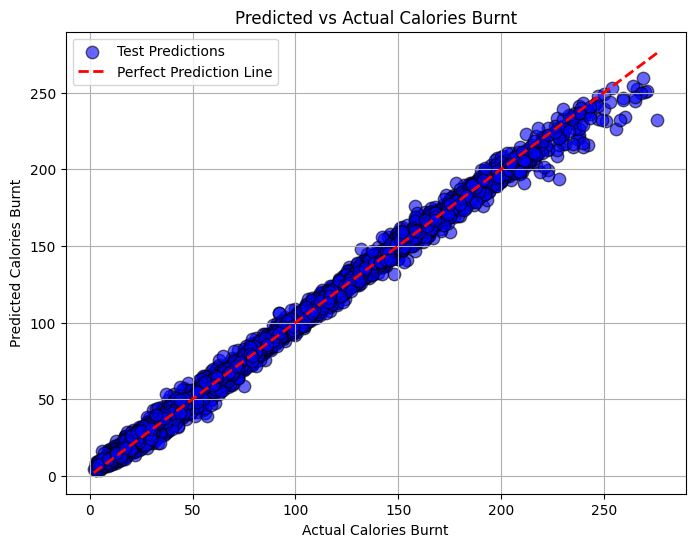

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Blue = Test set predictions
plt.scatter(y_te, y_pred, color="blue", alpha=0.6, edgecolor="k", s=80, label="Test Predictions")

# Perfect prediction line
plt.plot([y_te.min(), y_te.max()], [y_te.min(), y_te.max()], 'r--', lw=2, label="Perfect Prediction Line")

plt.xlabel("Actual Calories Burnt")
plt.ylabel("Predicted Calories Burnt")
plt.title("Predicted vs Actual Calories Burnt")
plt.grid(True)

# Add legend
plt.legend()
plt.show()


In [25]:
df_no_outliers

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190.0,94.0,29.0,105.0,40.0,231.0
1,0,20,166.0,60.0,14.0,94.0,40.0,66.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,0,34,179.0,71.0,13.0,100.0,40.0,71.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,0,20,193.0,86.0,11.0,92.0,40.0,45.0
14996,0,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,0,43,159.0,58.0,16.0,90.0,40.0,75.0
14998,1,78,193.0,97.0,2.0,84.0,38.3,11.0


# Testing the Model using User Inputs

In [ ]:
gender = int(input("Enter the Gender: (1 : Male or 0 : Female): "))
age = int(input("Enter the Age: "))
Height = int(input("Enter the Height (cm) (0 - 200): "))
weight = int(input("Enter the Weight (kg) (0 - 250): "))
Duration = int(input("Enter the Duration (1 - 120 minutes): "))
Heart_rate = int(input("Enter the Heart Rate (30 - 220 bpm) : "))
body_tmp = float(input("Enter the Body Temperature (°C): "))

In [ ]:
age = np.clip(age, 0, 120)
height = np.clip(Height, 0, 250)
weight = np.clip(weight, 0, 200)
Duration = np.clip(Duration, 0, 120)
heart_rate = np.clip(Heart_rate, 40, 200)
body_temp = np.clip(body_tmp, 35, 40)
gender = 1 if gender > 0 else 0

samples = [[gender,age,Height,weight,Duration,Heart_rate,body_tmp]]

user_pred = knn.predict(samples)

print('The Predicted Value for given Tuple is: {} kcal'.format(round(user_pred[0],2)))